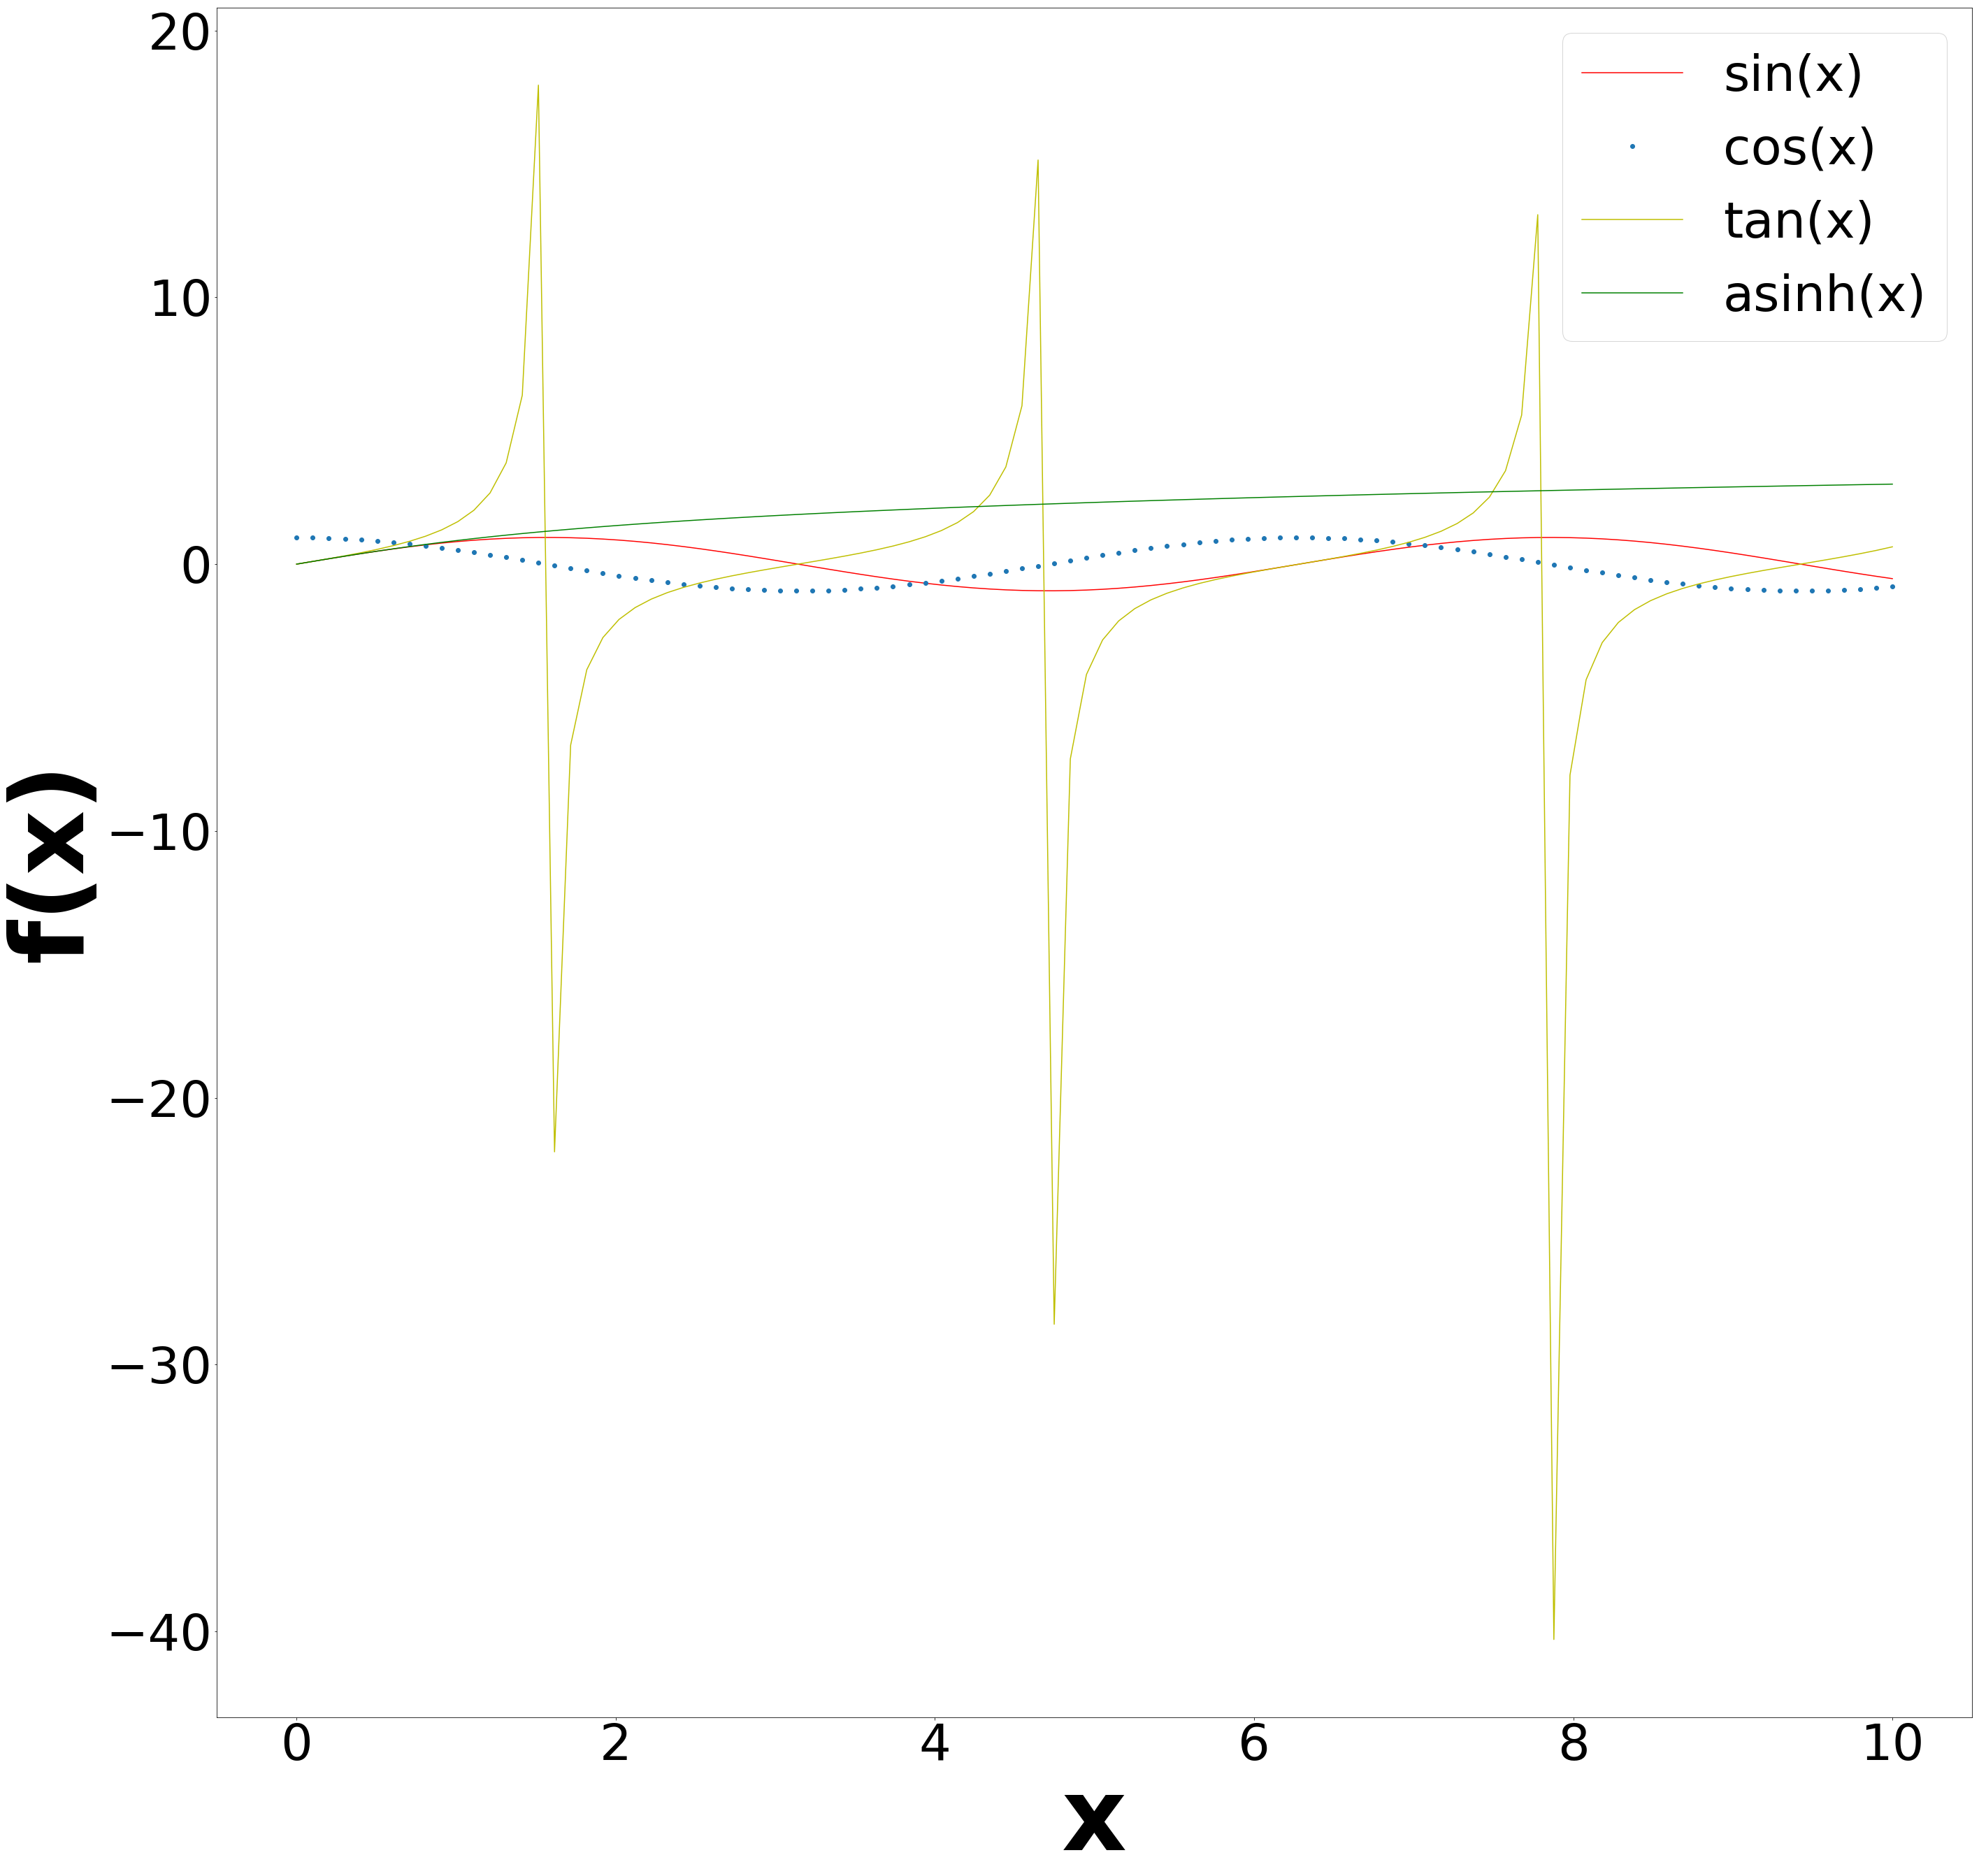

In [10]:

import matplotlib.pyplot as plt
import matplotlib.image as image
from math import sin, cos, tan, asinh
from numpy import linspace

x = []
y1 = []
y2 = []
y3 = []
y4 = []

for i in linspace(0,10,100):
    x.append(i)
    y1.append(sin(i))
    y2.append(cos(i))
    y3.append(tan(i))
    y4.append(asinh(i))
    

image.rcParams["figure.figsize"] = [45, 45]    
plt.plot(x, y1, 'r', label='sin(x)')
plt.plot(x, y2, 'o', label='cos(x)')
plt.plot(x, y3, 'y', label='tan(x)')
plt.plot(x, y4, 'g', label='asinh(x)')
plt.legend(fontsize=72)

plt.xlabel('x', size=144, weight=1000)
plt.xticks(size=72, weight=500)
plt.ylabel('f(x)', size=144, weight=1000)
plt.yticks(size=72, weight=500)
plt.show()

(501, 501)


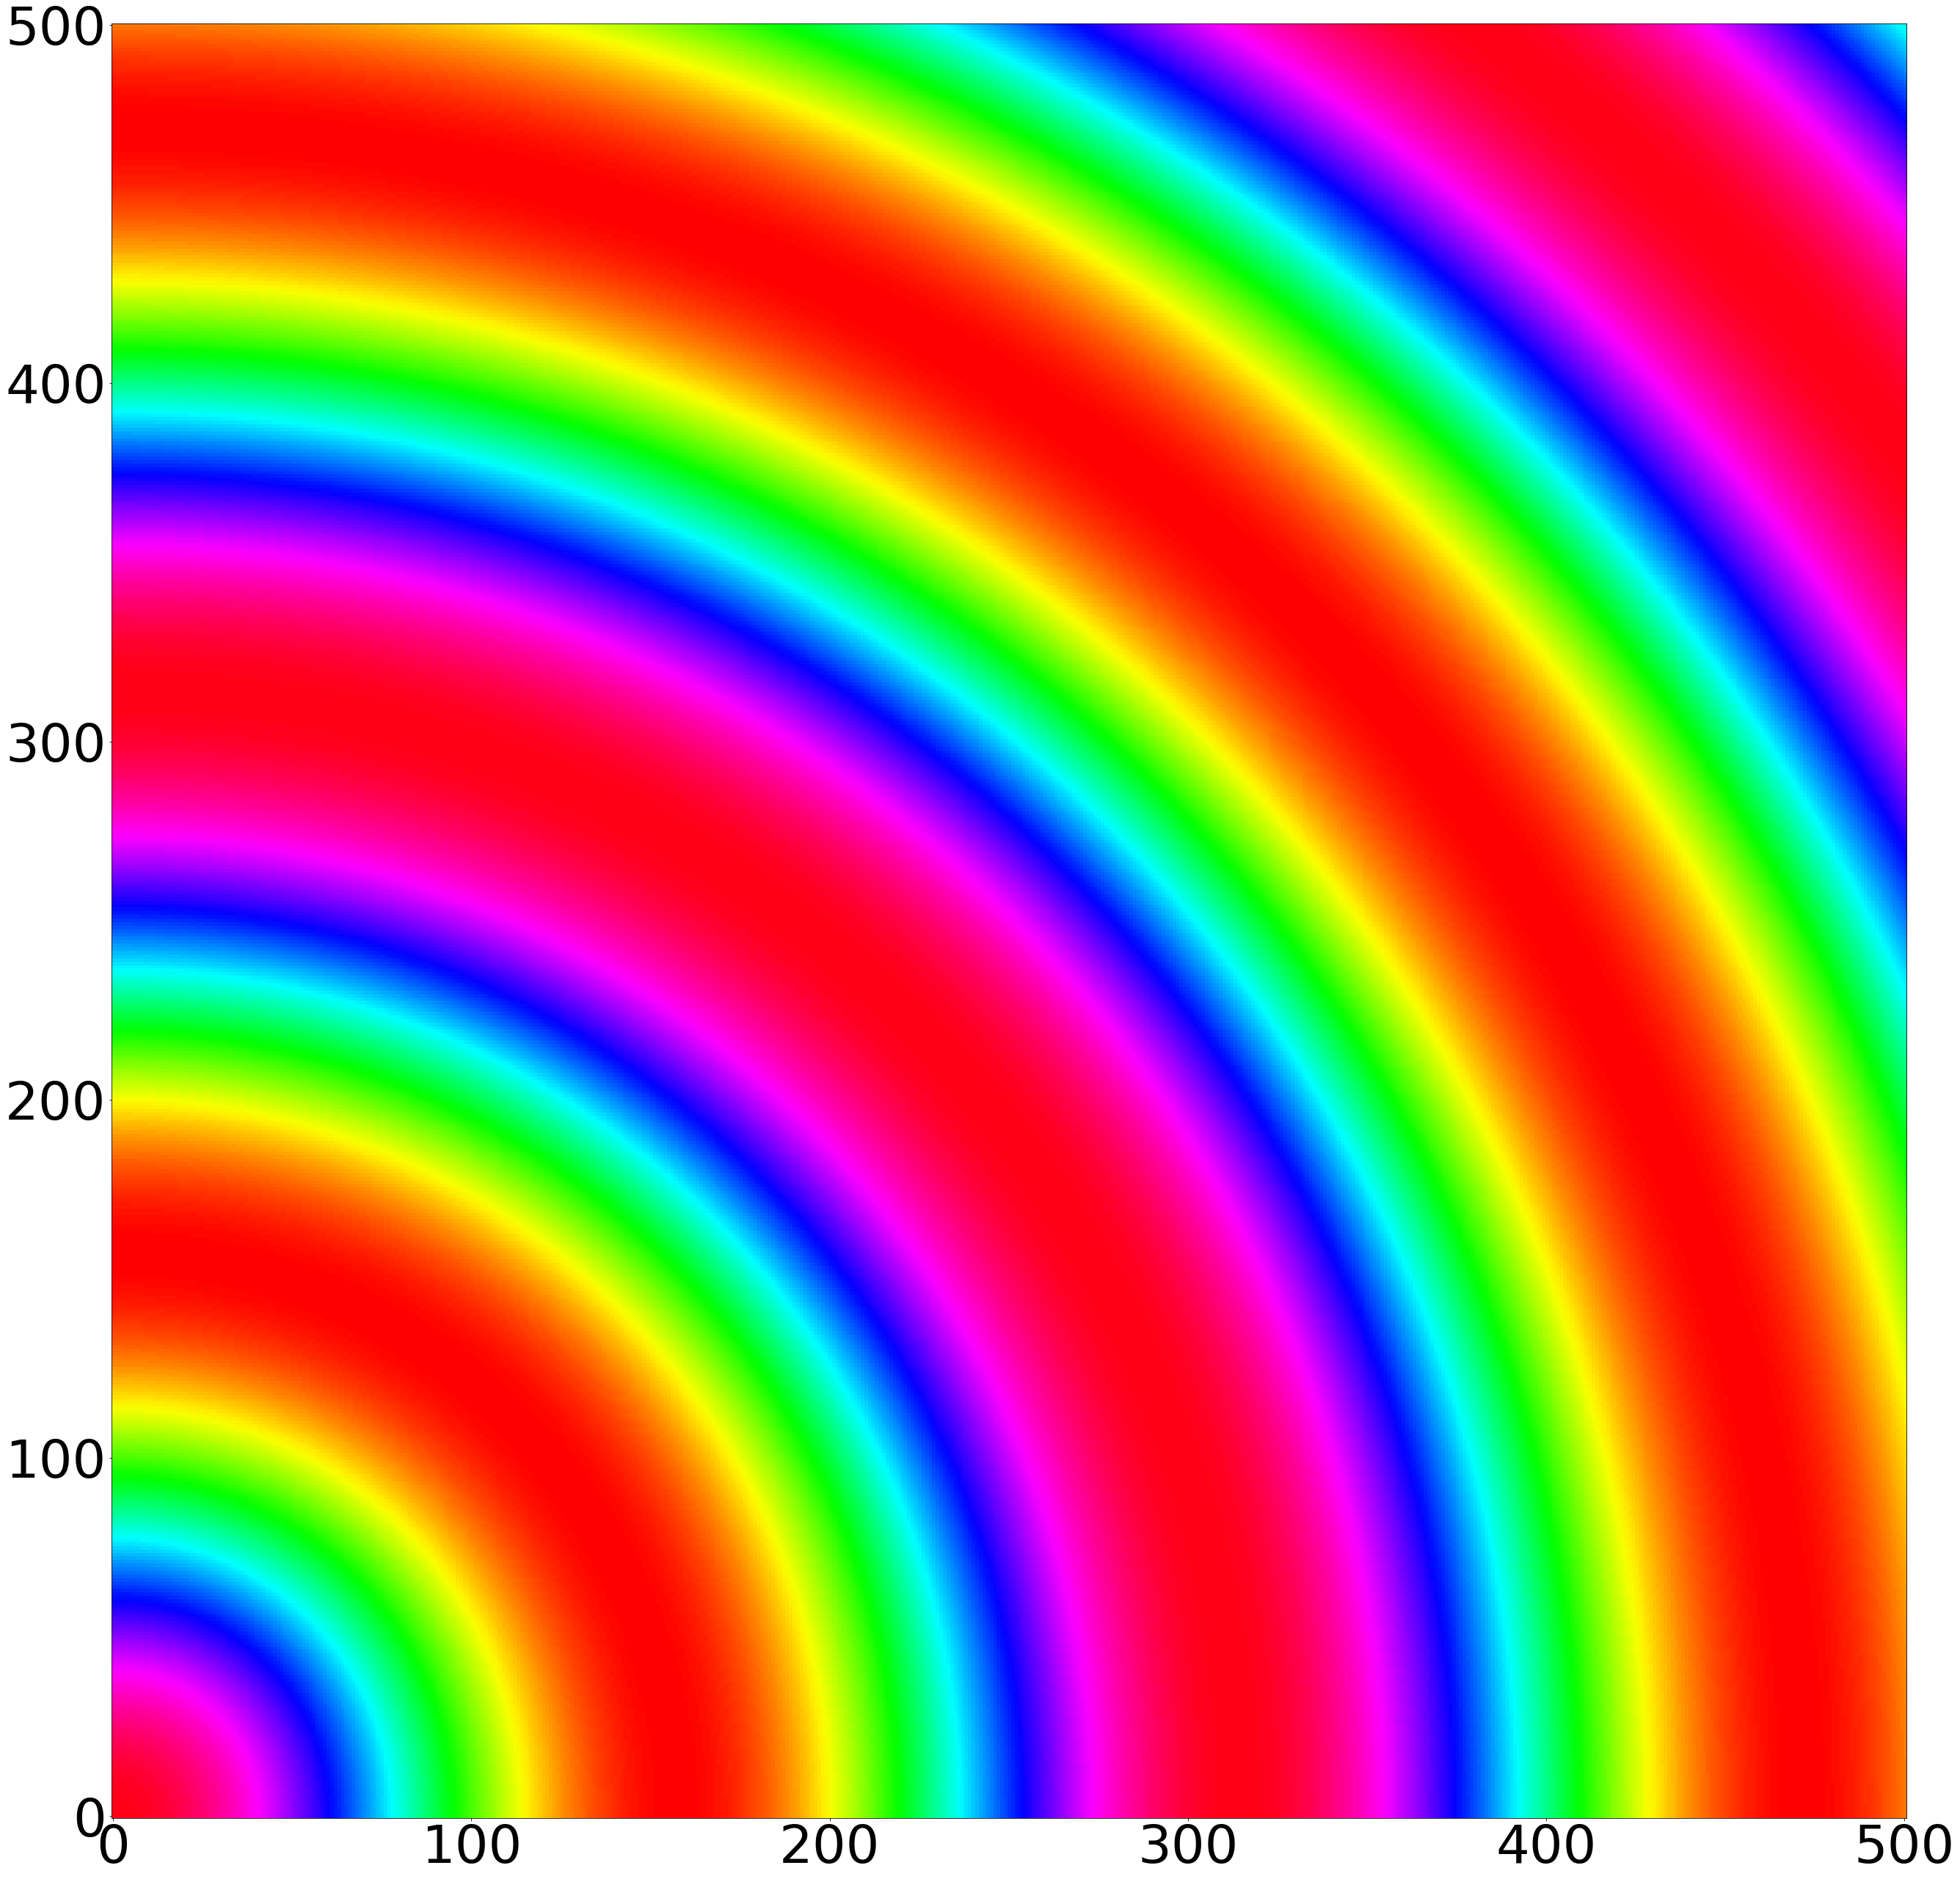

In [32]:
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt("/Users/user/Downloads/circular.txt",float)
print(np.shape(data))
plt.xticks(size=72, weight=500)
plt.yticks(size=72, weight=500)
plt.imshow(data, origin="lower")
plt.hsv()
plt.show()

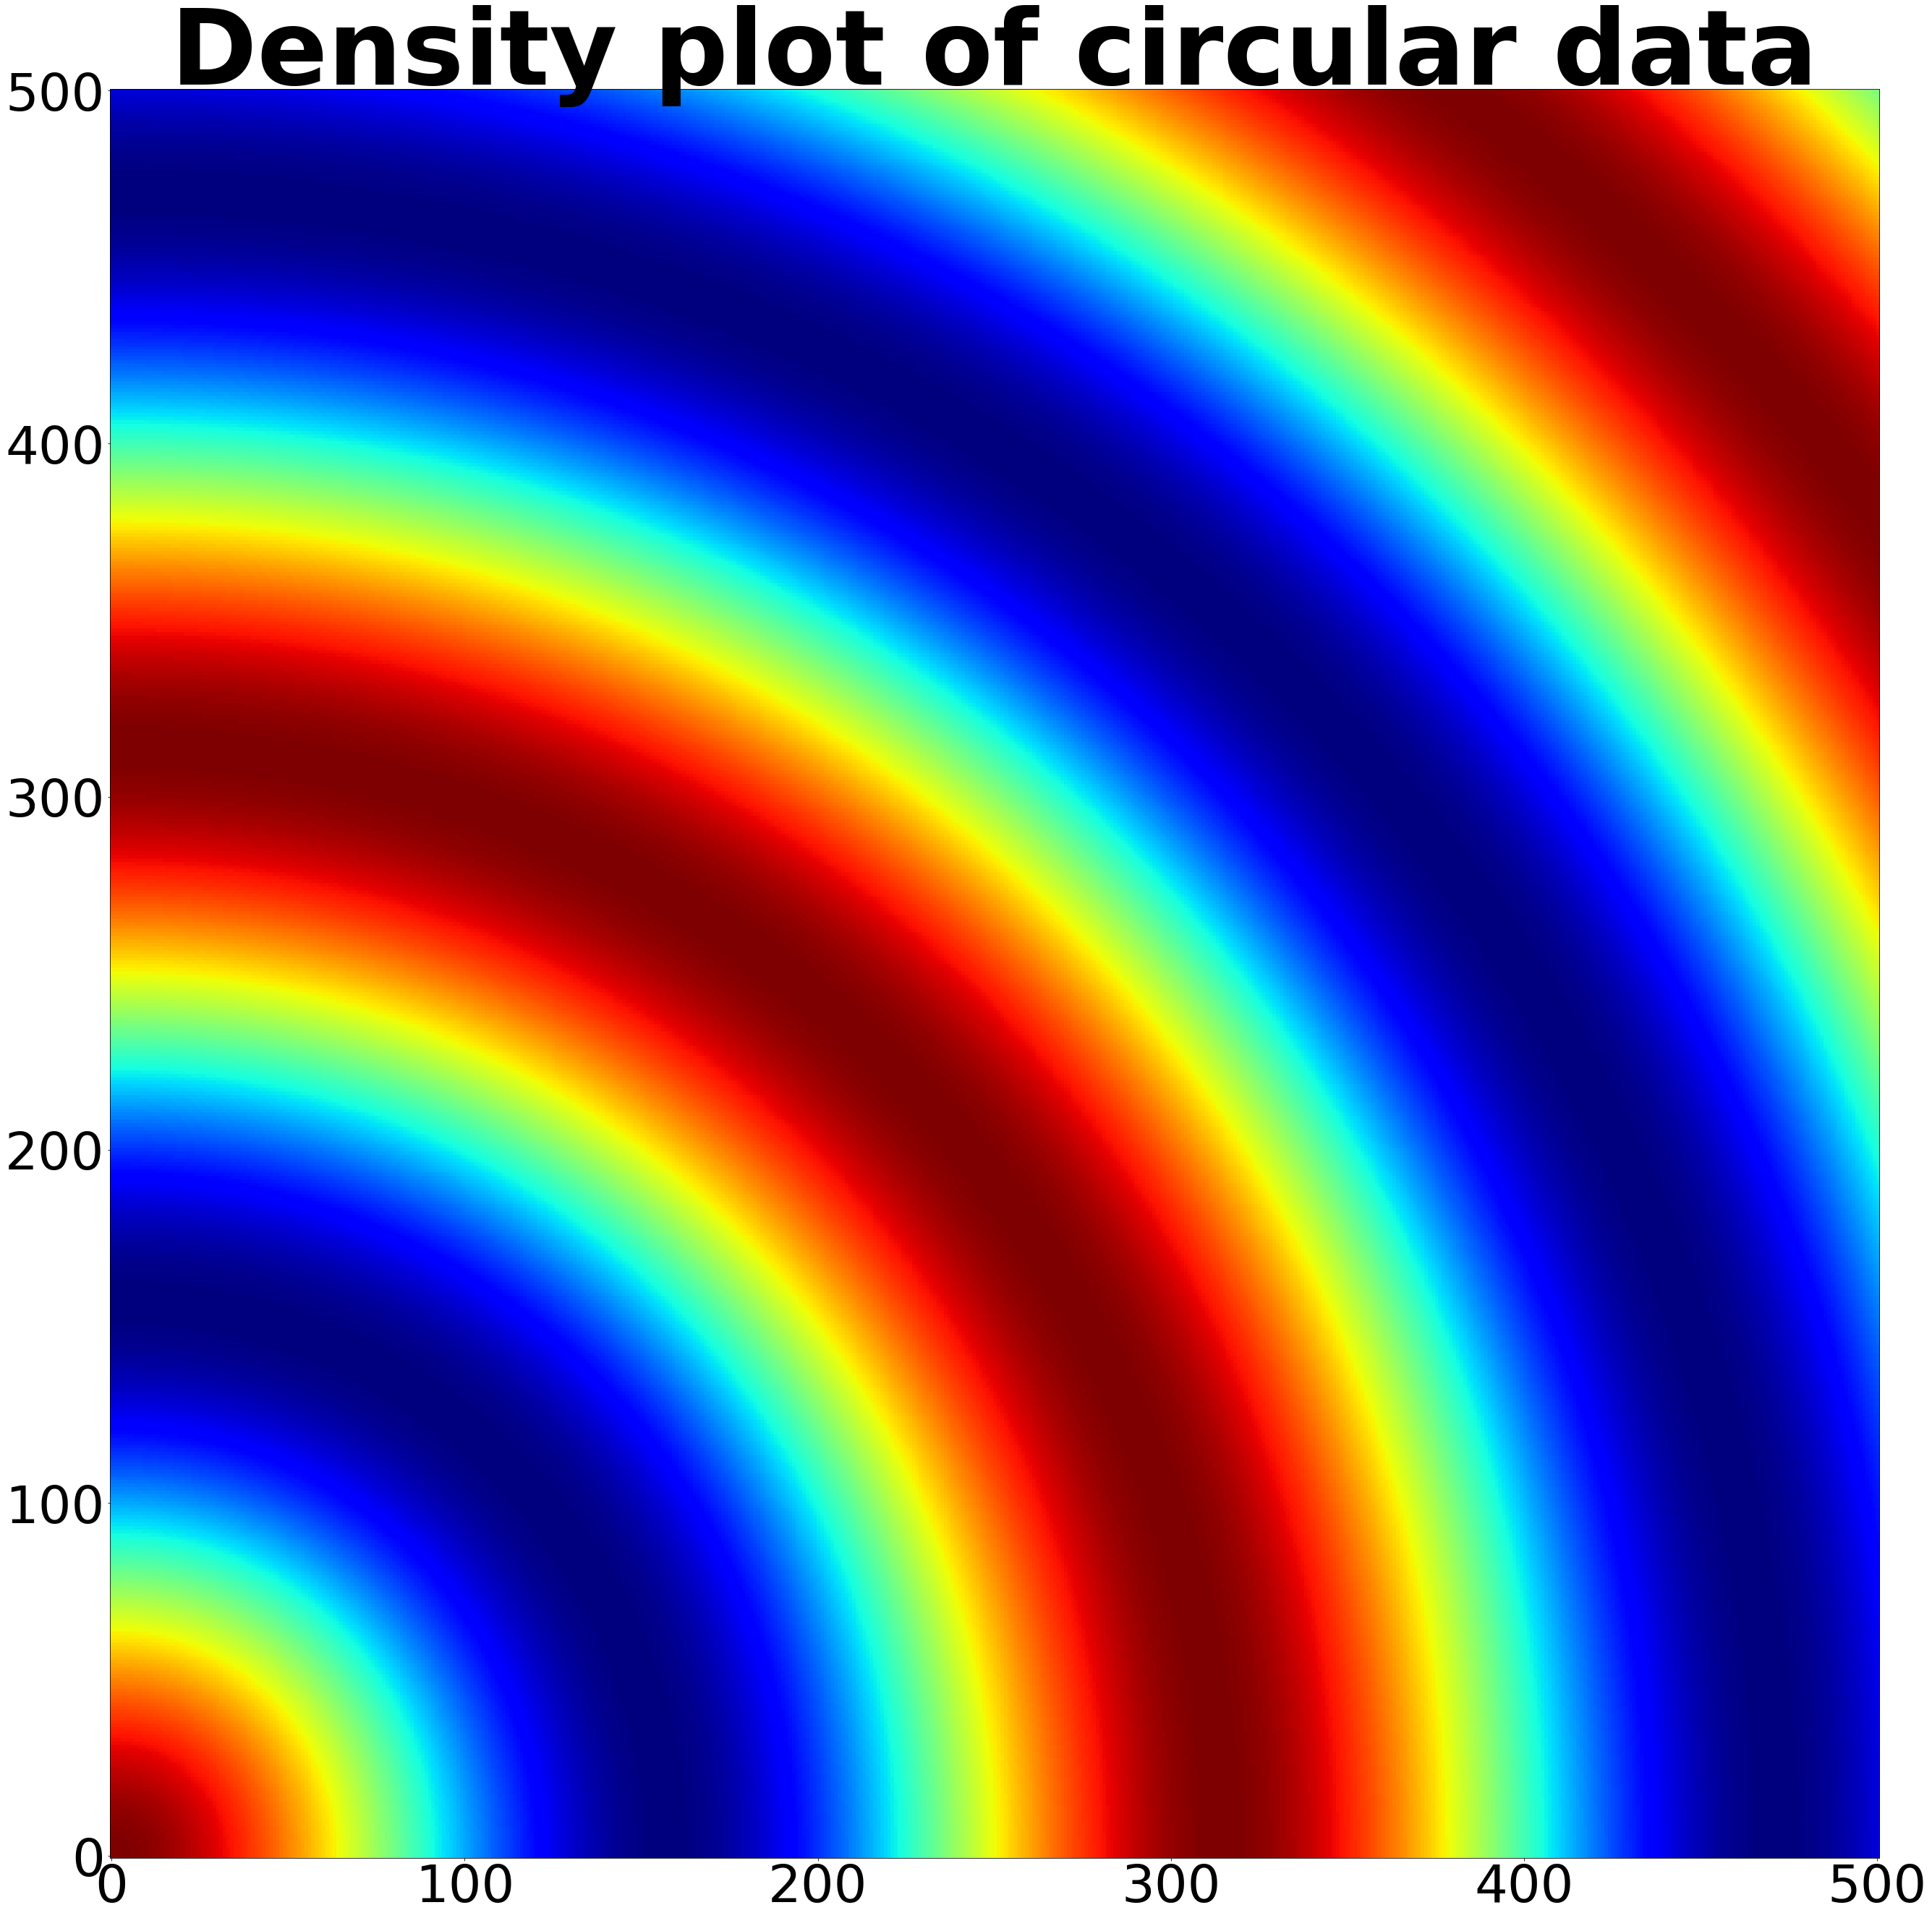

In [31]:
import urllib.request
import matplotlib.pyplot as plt
import numpy as np

req = urllib.request.Request('http://www-personal.umich.edu/~mejn/cp/data/circular.txt')
response = urllib.request.urlopen(req)
the_page = response.read().decode()

c_data = np.fromstring(the_page, dtype='float', sep=' ')
m_data = np.reshape(c_data, (501, 501))

plt.title('Density plot of circular data', size=144, weight=1000)
plt.xticks(size=72, weight=500)
plt.yticks(size=72, weight=500)
plt.imshow(m_data, origin="lower")
plt.jet()
plt.show()

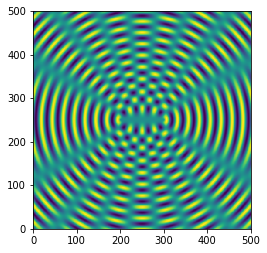

In [3]:
from math import sqrt,sin,pi
from numpy import empty
import matplotlib.pyplot as plt

wavelength = 5.0
k = 2*pi/wavelength
xi0 = 1.0
separation = 20.0      # Separation of centers in cm
side = 100.0           # Side of the square in cm
points = 500           # Number of grid points along each side
spacing = side/points  # Spacing of points in cm


# Calculate the positions of the centers of the circles
x1 = side/2 + separation/2
y1 = side/2
x2 = side/2 - separation/2
y2 = side/2

# Make an array to store the heights
xi = empty([points, points], float)

# Calculate the values in the array
for i in range(points):
    y = spacing*i
    for j in range(points):
        x = spacing*j
        r1 = sqrt((x-x1)**2+(y-y1)**2)
        r2 = sqrt((x-x2)**2+(y-y2)**2)
        xi[i,j] = xi0 * sin(k*r1) + xi0 * sin(k*r2)

# Make the plot
#plt.imshow(xi, origin="lower", extent=[0, side, 0, side])
plt.imshow(xi, origin="lower")
#plt.gray()
plt.show()

In [4]:
from vpython import *
L = 5
R = 0.3
for i in range(-L,L+1):
    for j in range(-L,L+1):
        for k in range(-L,L+1):
            sphere(pos=vector(i,j,k),radius=R)

ModuleNotFoundError: No module named 'vpython'

/Users/user/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in square
  app.launch_new_instance()
/Users/user/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in square
  app.launch_new_instance()
/Users/user/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in less


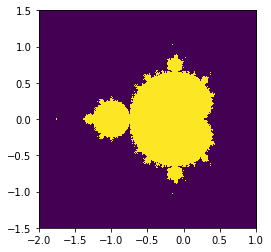

In [6]:
import numpy as npy
import matplotlib.pyplot as plt
from numpy import newaxis

def compute_mandelbrot(N_max, some_threshold, nx, ny):
    # A grid of c-values
    x = npy.linspace(-2, 1, nx)
    y = npy.linspace(-1.5, 1.5, ny)

    c = x[:,newaxis] + 1j*y[newaxis,:]

    # Mandelbrot iteration

    z = c
    for j in range(N_max):
        z = z**2 + c

    mandelbrot_set = (abs(z) < some_threshold)

    return mandelbrot_set

mandelbrot_set = compute_mandelbrot(50, 50., 601, 401)

plt.imshow(mandelbrot_set.T, extent=[-2, 1, -1.5, 1.5])
plt.show()


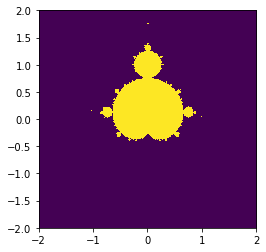

In [11]:
import numpy as npy
import matplotlib.pyplot as plt
from numpy import zeros,linspace

N=1000
A=zeros([N+1,N+1],float)
def mandler(x,y):
    c=complex(x,y)
    z=c
    n=0
    while n<N:
        z=z*z+c
        if abs(z)>2:
            return 0
        n+=1
    else:
        return 1
for x in npy.linspace(-2,2,N):
    for y in npy.linspace(2,-2,N):
        a=mandler(x,y)
        s=int(((x+2)*N)/4)
        t=int(((y+2)*N)/4)
        A[s,t]=a
plt.imshow(A, extent=[-2, 2, -2, 2])
plt.show()

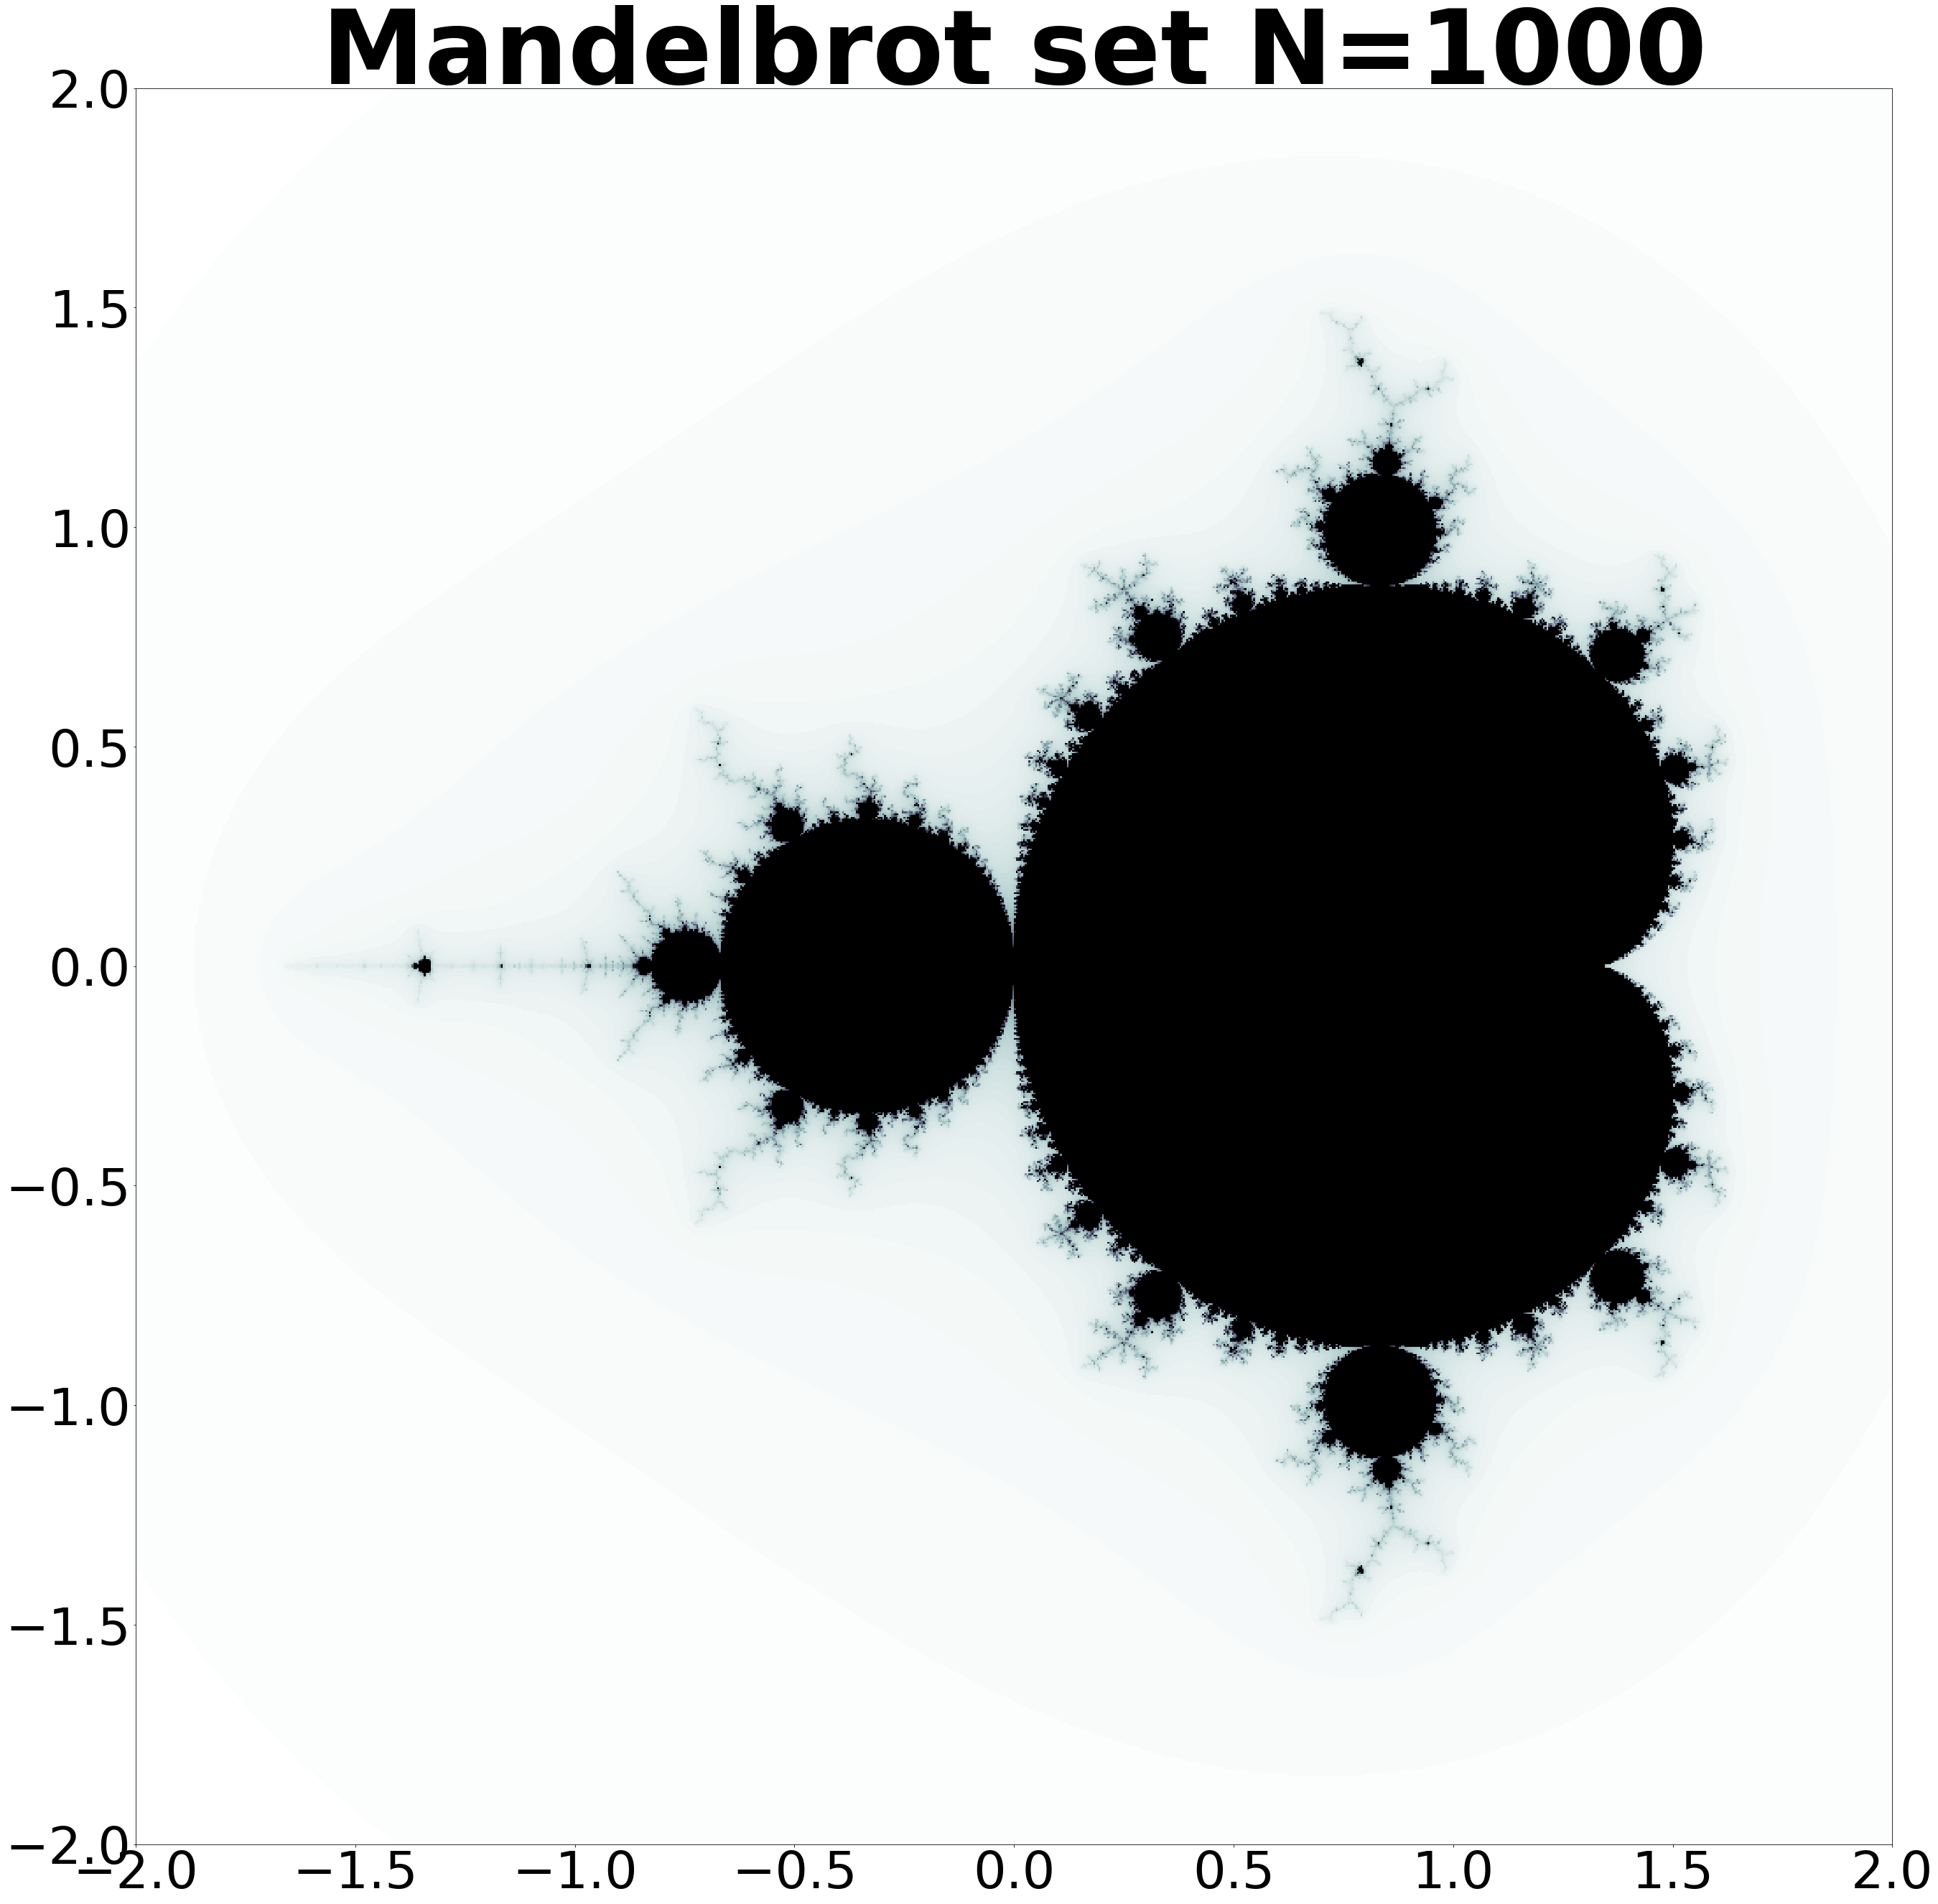

In [68]:
import numpy as npy
import matplotlib.pyplot as plt
import matplotlib.image as image

# counts the number of iterations until the function diverges or
# returns the iteration threshold that we check until
def countIterationsUntilDivergent(c, threshold):
    z = complex(0, 0)
    for iteration in range(threshold):
        z = (z*z) + c

        if abs(z) > 4:
            break
            pass
        pass
    return iteration

# takes the iteration limit before declaring function as convergent and
# takes the density of the atlas
# create atlas, plot mandelbrot set, display set
def mandelbrot(threshold, density):
    # location and size of the atlas rectangle
    realAxis = npy.linspace(-2.25, 0.75, density)
    imaginaryAxis = npy.linspace(-1.5, 1.5, density)
    #realAxis = np.linspace(-0.22, -0.219, 1000)
    #imaginaryAxis = npy.linspace(-0.70, -0.699, 1000)
    realAxisLen = len(realAxis)
    imaginaryAxisLen = len(imaginaryAxis)

    # 2-D array to represent mandelbrot atlas
    atlas = npy.empty((realAxisLen, imaginaryAxisLen))

    # color each point in the atlas depending on the iteration count
    for ix in range(realAxisLen):
        for iy in range(imaginaryAxisLen):
            cx = realAxis[ix]
            cy = imaginaryAxis[iy]
            c = complex(cx, cy)

            atlas[ix, iy] = countIterationsUntilDivergent(c, threshold)
            pass
        pass

    # plot and display mandelbrot set
    
    image.rcParams["figure.figsize"] = [45, 45]
    plt.title('Mandelbrot set N=1000', size=144, weight=1000)
    plt.xticks(size=72, weight=500)
    plt.yticks(size=72, weight=500)
    plt.imshow(atlas.T, interpolation="nearest", extent=[-2, 2, -2, 2])
    #plt.bone()
    plt.set_cmap('bone_r')
    plt.show()

# time to party!!
mandelbrot(120, 1000)

In [28]:
a = zeros([3, 2])
print(a)

[[0. 0.]
 [0. 0.]
 [0. 0.]]


In [29]:
a[0,0] = 1
a[0,1] = 2
a[1,0] = 9
a[2,1] = 12
print(a)


[[ 1.  2.]
 [ 9.  0.]
 [ 0. 12.]]


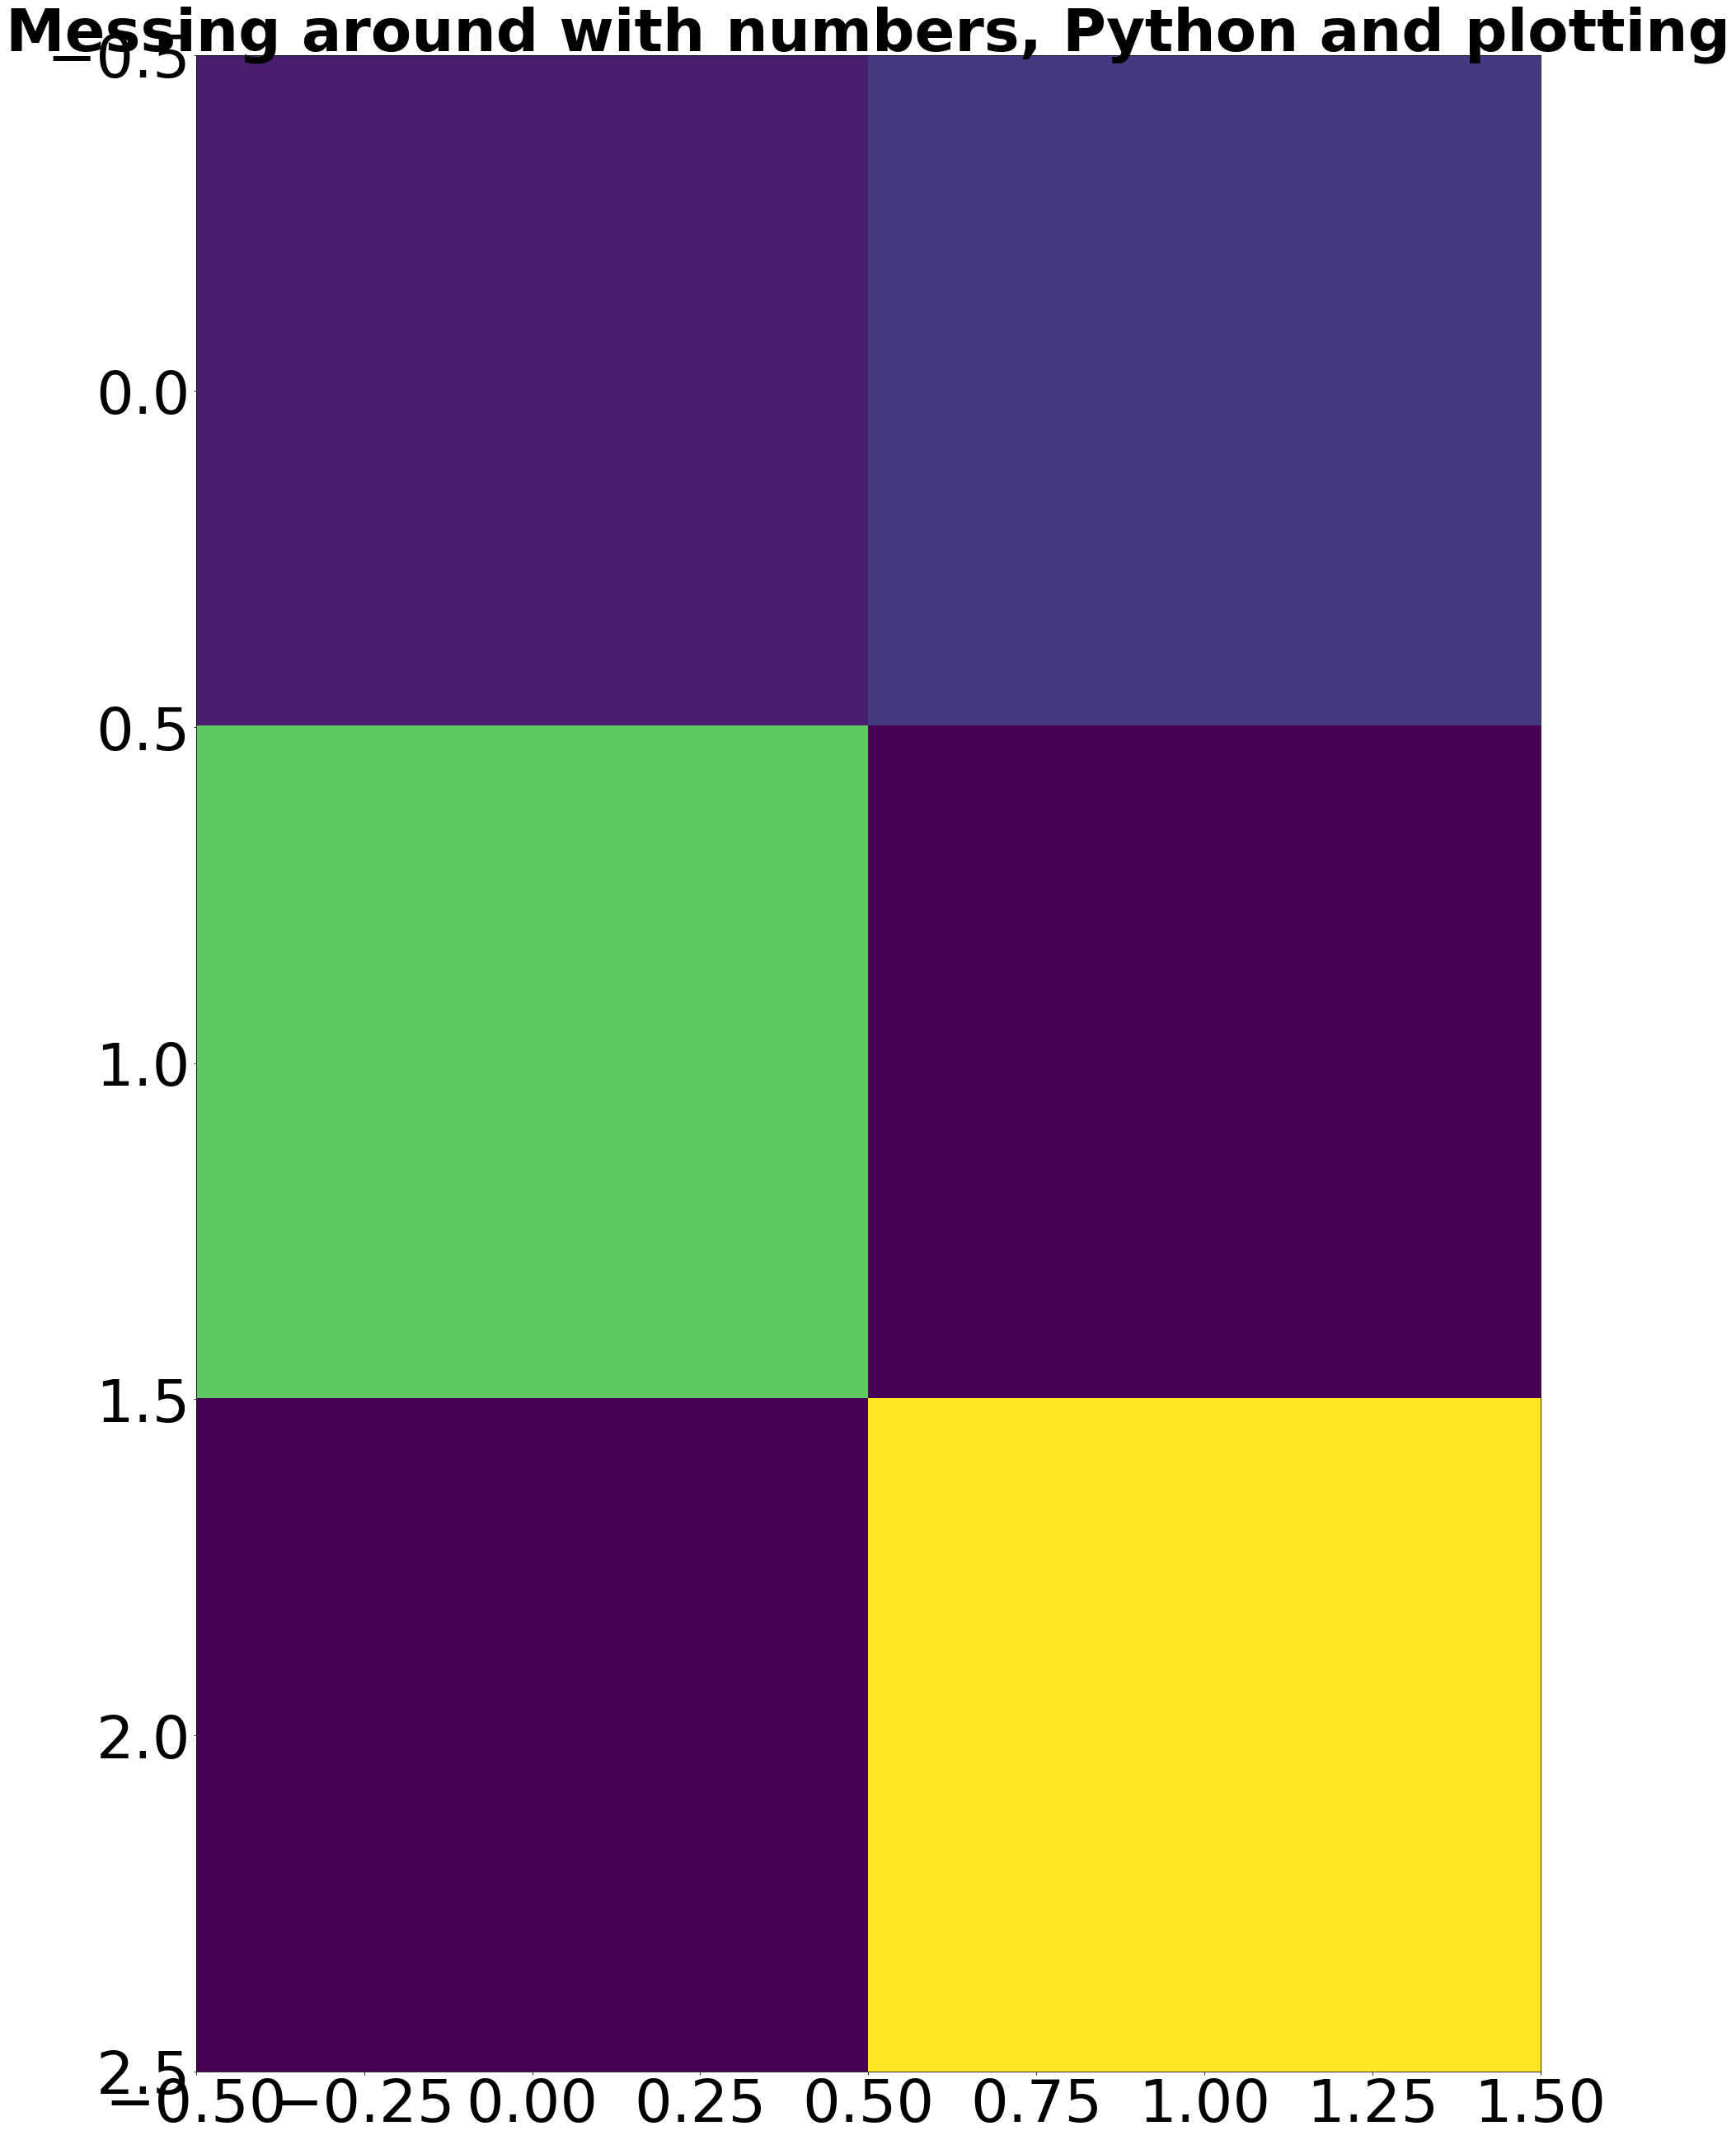

In [33]:
import matplotlib.pyplot as plt

plt.title('Messing around with numbers, Python and plotting', size=72, weight=1000)
plt.xticks(size=72, weight=500)
plt.yticks(size=72, weight=500)
plt.imshow(a, interpolation="nearest")
plt.show()

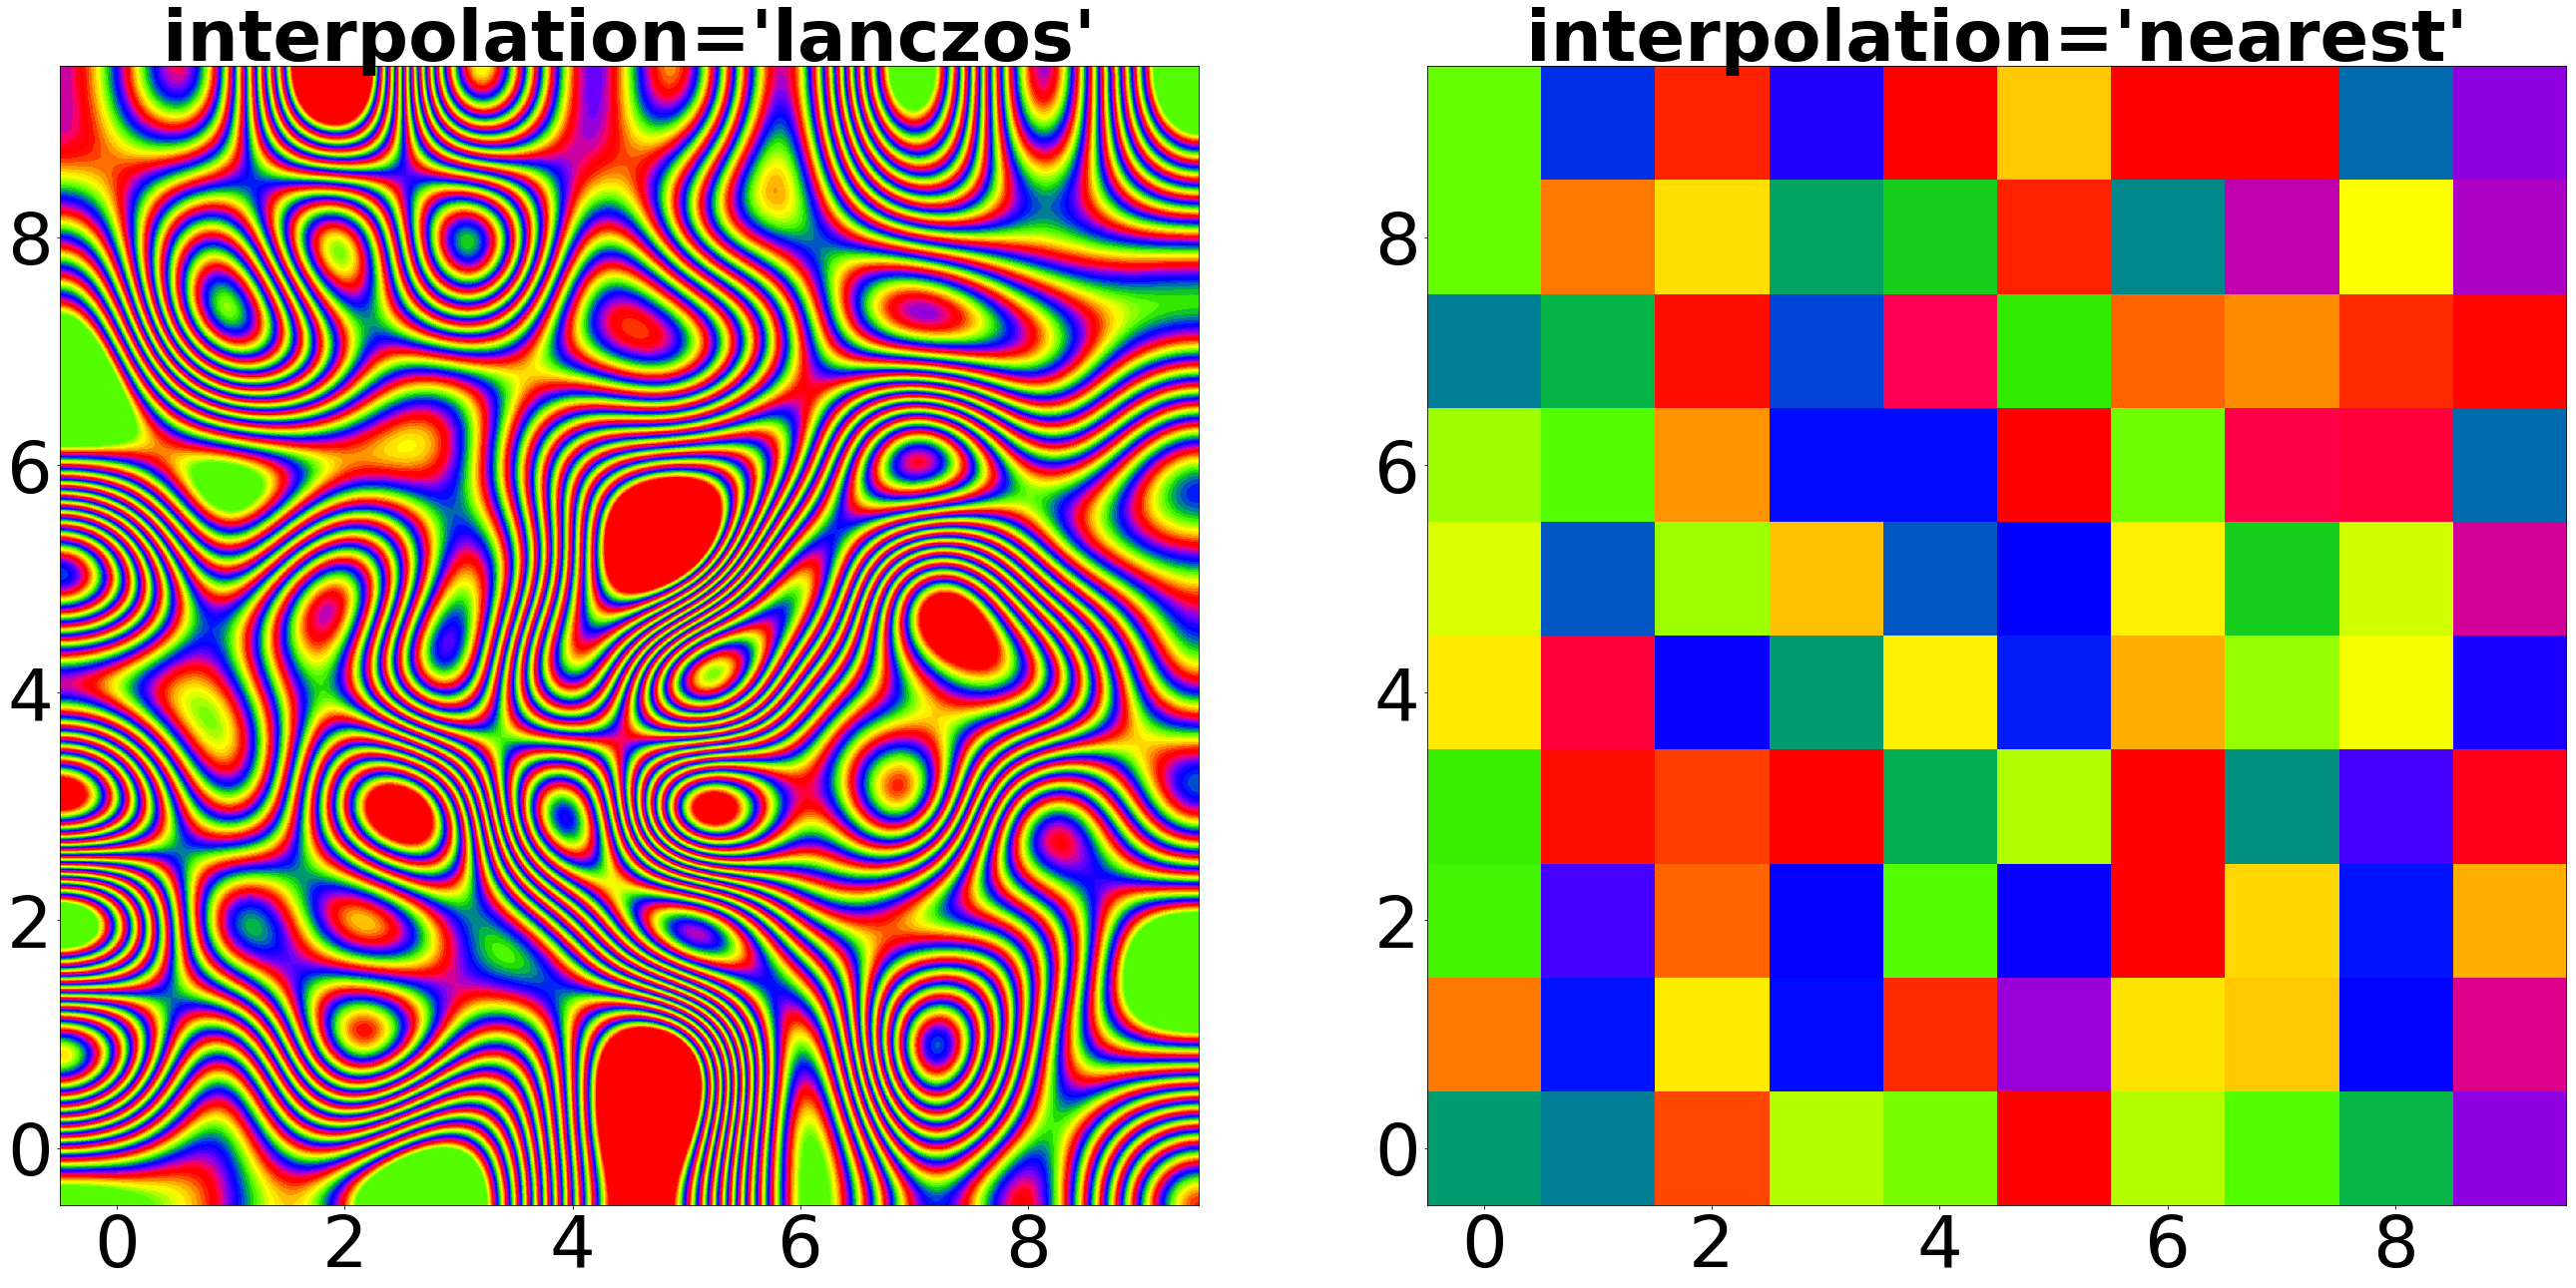

[[0.81489348 0.91068112 0.77432515 0.98564985 0.24070112 0.01181949
  0.98648995 0.52367848 0.7186311  0.37625118]
 [0.31027893 0.63920603 0.13449533 0.36112848 0.20980742 0.09469444
  0.88293512 0.13084679 0.5494737  0.94331901]
 [0.90136333 0.27321963 0.40149055 0.267025   0.52280545 0.92234262
  0.57853429 0.50604104 0.63981041 0.96996291]
 [0.15392859 0.58345989 0.1166235  0.2033446  0.90987059 0.04645863
  0.20147093 0.06810133 0.7431312  0.576471  ]
 [0.6018041  0.66526835 0.45670771 0.81614817 0.32041323 0.92019018
  0.49993916 0.14466015 0.13544492 0.54968248]
 [0.23315101 0.72744987 0.42490146 0.87792675 0.25851579 0.07907203
  0.78919318 0.15704114 0.42143904 0.756571  ]
 [0.89381355 0.99517545 0.87411029 0.82933049 0.35818972 0.10997496
  0.42832158 0.94789049 0.66866152 0.81930054]
 [0.91407911 0.25191893 0.5830112  0.63487914 0.76061715 0.80924378
  0.40135074 0.21721592 0.21109273 0.39359683]
 [0.61607226 0.30898047 0.69184588 0.16156294 0.62384884 0.49096234
  0.25539247

In [88]:
import matplotlib.pyplot as plt
import numpy as npy


a = npy.random.rand(10,10)

#plt.suptitle('Messing around with numbers, Python and plotting', size=72, weight=800)
plt.subplot(121)
plt.imshow(a, interpolation="lanczos", origin="lower")
plt.xticks(size=72, weight=500)
plt.yticks(size=72, weight=500)
plt.title("interpolation='lanczos'", size=72, weight=1000)

plt.subplot(122)
plt.imshow(a, interpolation="nearest", origin="lower")
plt.xticks(size=72, weight=500)
plt.yticks(size=72, weight=500)
plt.title("interpolation='nearest'", size=72, weight=1000)

#plt.subplots_adjust(left=0.2)
plt.prism()
plt.show()
print(a)

In [76]:
a_c = complex(2, 3)
print(a_c)
print(a_c * complex(1, -4))
print(a_c**2)

(2+3j)
(14-5j)
(-5+12j)


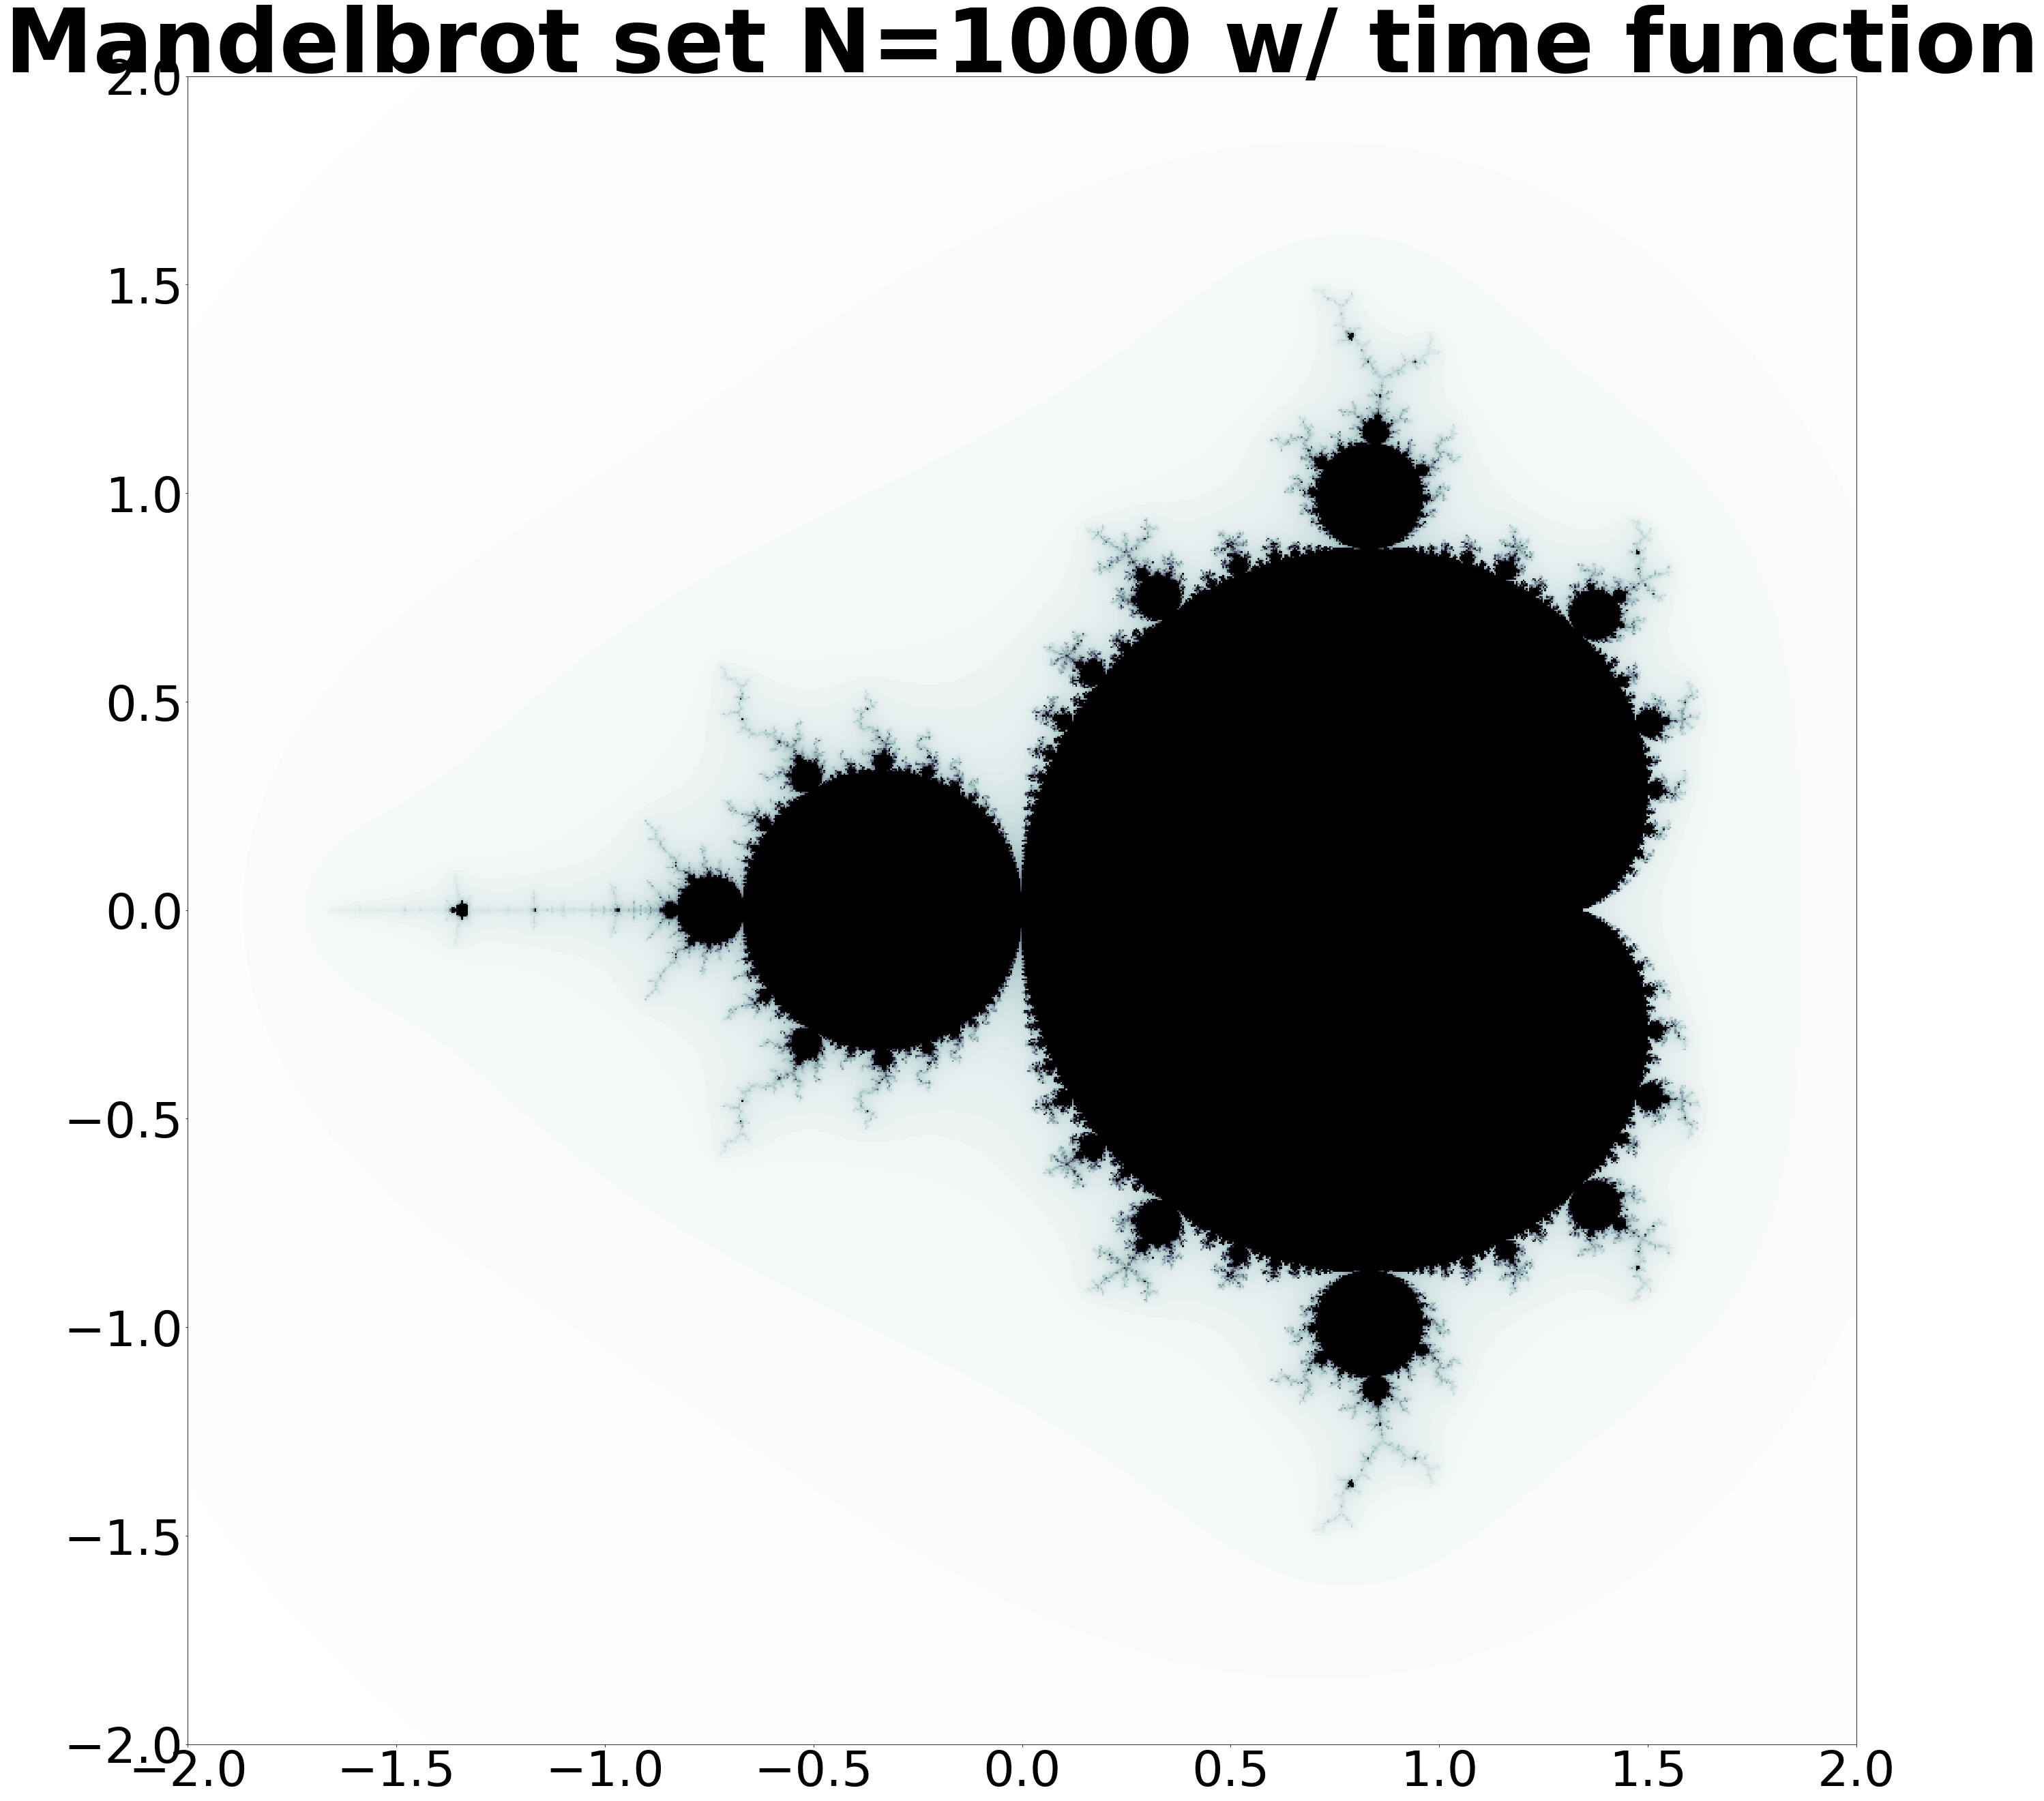

9.64110779762268


In [3]:
import numpy as npy
import matplotlib.pyplot as plt
import matplotlib.image as image
import time

# counts the number of iterations until the function diverges or
# returns the iteration threshold that we check until
def countIterationsUntilDivergent(c, threshold):
    z = complex(0, 0)
    for iteration in range(threshold):
        z = (z*z) + c

        if abs(z) > 4:
            break
            pass
        pass
    return iteration

# takes the iteration limit before declaring function as convergent and
# takes the density of the atlas
# create atlas, plot mandelbrot set, display set
def mandelbrot(threshold, density):
    # location and size of the atlas rectangle
    realAxis = npy.linspace(-2.25, 0.75, density)
    imaginaryAxis = npy.linspace(-1.5, 1.5, density)
    #realAxis = np.linspace(-0.22, -0.219, 1000)
    #imaginaryAxis = npy.linspace(-0.70, -0.699, 1000)
    realAxisLen = len(realAxis)
    imaginaryAxisLen = len(imaginaryAxis)

    # 2-D array to represent mandelbrot atlas
    atlas = npy.empty((realAxisLen, imaginaryAxisLen))

    # color each point in the atlas depending on the iteration count
    for ix in range(realAxisLen):
        for iy in range(imaginaryAxisLen):
            cx = realAxis[ix]
            cy = imaginaryAxis[iy]
            c = complex(cx, cy)

            atlas[ix, iy] = countIterationsUntilDivergent(c, threshold)
            pass
        pass

    # plot and display mandelbrot set
    
    image.rcParams["figure.figsize"] = [45, 45]
    plt.title('Mandelbrot set N=1000 w/ time function', size=130, weight=1000)
    plt.xticks(size=72, weight=500)
    plt.yticks(size=72, weight=500)
    plt.imshow(atlas.T, interpolation="nearest", extent=[-2, 2, -2, 2])
    #plt.bone()
    plt.set_cmap('bone_r')
    plt.show()

# time to party!!
t1 = time.time()
mandelbrot(120, 1000)
t2 = time.time()
print(t2 - t1)